In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.DataFrame()
df["x1"] = [1,2,3,4,5,6,6,7,9,9]
df["x2"] = [5,3,6,8,1,9,5,8,9,2]
df["label"] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


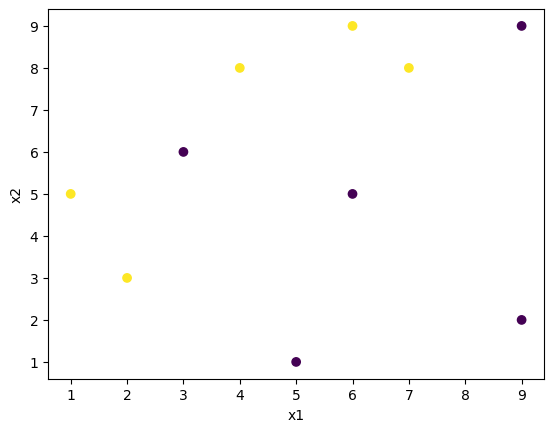

In [6]:
plt.scatter(df["x1"],df["x2"],c=df["label"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [7]:
df["weights"] = 1/df.shape[0]
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(df.iloc[:,0:2],df.iloc[:,-2])

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

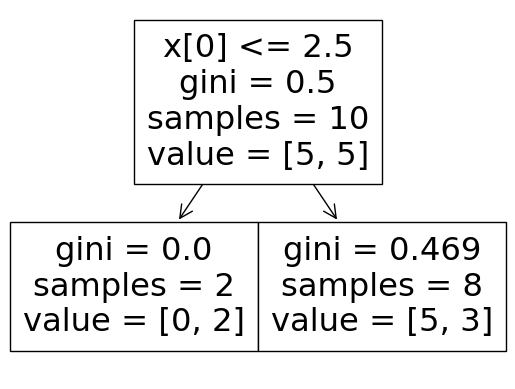

In [9]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [15]:
X = np.array(df.iloc[:,0:2])
y = np.array(df.iloc[:,-2])
type(X)

numpy.ndarray

c:\Users\HEET BHATT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

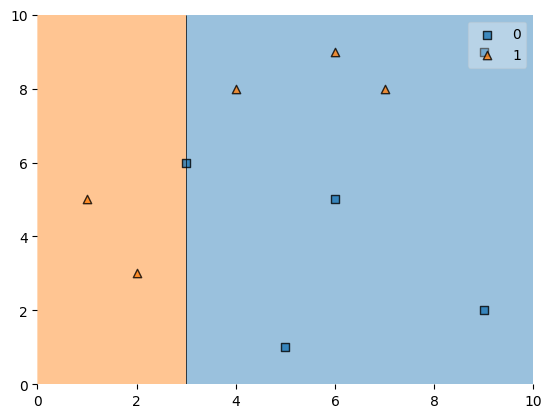

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf = dt,legend=True)

In [19]:
df["y_pred"] = dt.predict(X)

c:\Users\HEET BHATT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [20]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [28]:
def calculate_alpha(error):
    return 0.5*np.log((1-error)/(error))


In [29]:
alpha1 = calculate_alpha(0.3)
alpha1

0.42364893019360184

In [56]:
def update_row_weights(row,alpha=1.09):
    if(row["label"]!=row["y_pred"]):
        return row["weights"]*np.exp(alpha)      
    else:
        return row["weights"]*np.exp(-alpha)

In [35]:
df["updated_weights"] = df.apply(update_row_weights,axis =1)

In [36]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [37]:
df["updated_weights"].sum()

0.9165153319682015

In [38]:
df["Normalized_weights"] = df["updated_weights"]/df["updated_weights"].sum()
df

,x1,x2,label,weights,y_pred,updated_weights,Normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [39]:
df["Normalized_weights"].sum()

1.0

In [43]:
df["cumsum_upper"] = np.cumsum(df["Normalized_weights"])
df["cumsum_lower"] = df["cumsum_upper"] - df["Normalized_weights"]
df[["x1","x2","label","weights","y_pred","updated_weights","Normalized_weights","cumsum_lower","cumsum_upper"]]

,x1,x2,label,weights,y_pred,updated_weights,Normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [46]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if a<row["cumsum_upper"] and a>row["cumsum_lower"]:
                indices.append(index)
    return indices 

In [47]:
index_values = create_new_dataset(df)
index_values

[5, 0, 0, 2, 3, 8, 3, 5, 9, 7]

In [50]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,x1,x2,label,weights
5,6,9,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
7,7,8,1,0.1


In [51]:
dt2 = DecisionTreeClassifier(max_depth =1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

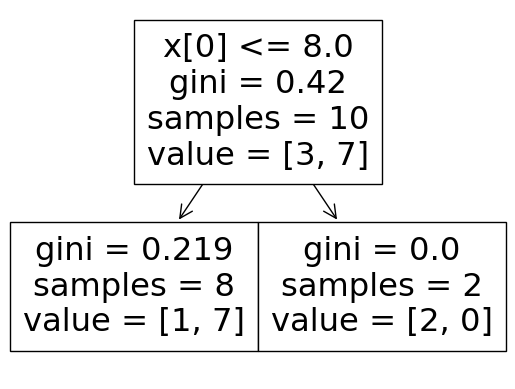

In [52]:
dt2.fit(X,y)
plot_tree(dt2)

<Axes: >

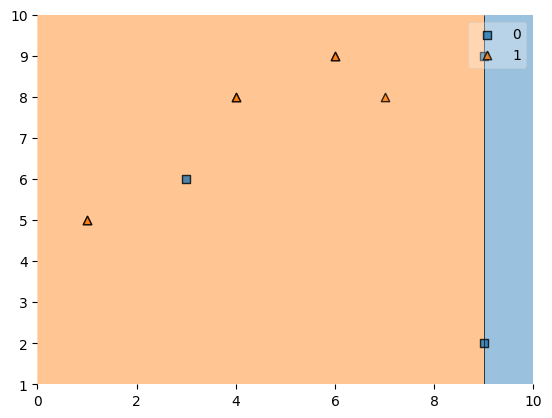

In [53]:
plot_decision_regions(X,y,clf = dt2)

In [54]:
second_df["y_pred"] = dt2.predict(X)

In [55]:
alpha2 = calculate_alpha(0.1)
alpha2

1.0986122886681098

In [57]:
second_df["updated_weights"] = second_df.apply(update_row_weights,axis=1)
second_df

,x1,x2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
2,3,6,0,0.1,1,0.297427
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622


In [58]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
5,6,9,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034


In [60]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['x1','x2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.056034,0.000000,0.056034
0,1,5,1,0.1,1,0.056034,0.056034,0.112068
0,1,5,1,0.1,1,0.056034,0.112068,0.168102
2,3,6,0,0.1,1,0.495694,0.168102,0.663796
3,4,8,1,0.1,1,0.056034,0.663796,0.719830
8,9,9,0,0.1,0,0.056034,0.719830,0.775864
3,4,8,1,0.1,1,0.056034,0.775864,0.831898
5,6,9,1,0.1,1,0.056034,0.831898,0.887932
9,9,2,0,0.1,0,0.056034,0.887932,0.943966
7,7,8,1,0.1,1,0.056034,0.943966,1.000000


In [61]:
index_values = create_new_dataset(second_df)
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df
     

,x1,x2,label,weights
2,3,6,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [62]:

dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

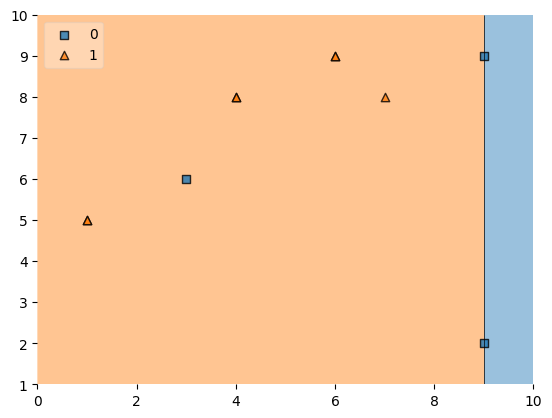

In [63]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [64]:

third_df['y_pred'] = dt3.predict(X)
third_df

,x1,x2,label,weights,y_pred
2,3,6,0,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,1
5,6,9,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,1
5,6,9,1,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,1


In [65]:
alpha3 = calculate_alpha(0.7)
alpha3

-0.4236489301936017

In [66]:

query = np.array([1,5]).reshape(1,2)
dt.predict(query)
dt2.predict(query)
dt3.predict(query)
alpha1*1 + alpha2*(1) + alpha3*(1)

c:\Users\HEET BHATT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.09861228866811

In [67]:
np.sign(1.09)

1.0